# Linear Regression Stock Prices - Google Prediction

Predicting Google Stock Prices using Linear Regressions

In [1]:
import pandas as pd
import numpy as np
import datetime
import quandl
import math
import matplotlib.pyplot as plt
from matplotlib import style

from sklearn import preprocessing #for scaling data
from sklearn.model_selection import train_test_split # for training and testing samples, splitting, shuffling
from sklearn import svm # can use for regression
from sklearn.linear_model import LinearRegression

%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

### Fetch Stock Data via Quandl

In [2]:
df = quandl.get('WIKI/GOOGL')

print(df.head())

              Open    High     Low     ...       Adj. Low  Adj. Close  \
Date                                   ...                              
2004-08-19  100.01  104.06   95.96     ...         48.129      50.323   
2004-08-20  101.01  109.08  100.50     ...         50.406      54.323   
2004-08-23  110.76  113.48  109.05     ...         54.694      54.869   
2004-08-24  111.24  111.60  103.57     ...         51.945      52.597   
2004-08-25  104.76  108.00  103.88     ...         52.101      53.164   

            Adj. Volume  
Date                     
2004-08-19    4.466e+07  
2004-08-20    2.283e+07  
2004-08-23    1.826e+07  
2004-08-24    1.525e+07  
2004-08-25    9.189e+06  

[5 rows x 12 columns]


### Create Calculated Columns - High - Low % , Percentage Change

In [3]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['High_Low_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0 # High Low %
df['Percent_Change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0 # % change in stock prices

df = df[['Adj. Close', 'High_Low_PCT', 'Percent_Change', 'Adj. Volume']] # We only care about these features.

print(df.head())

            Adj. Close  High_Low_PCT  Percent_Change  Adj. Volume
Date                                                             
2004-08-19      50.323         3.713           0.325    4.466e+07
2004-08-20      54.323         0.711           7.227    2.283e+07
2004-08-23      54.869         3.729          -1.228    1.826e+07
2004-08-24      52.597         6.417          -5.726    1.525e+07
2004-08-25      53.164         1.887           1.184    9.189e+06


### Create Label Column for Forecast

In [4]:
forecast_column = 'Adj. Close'
# To not waste data, we provide features with any null values with some outlier like -112233
df.fillna(-112233, inplace=True) # na means not available, used to fill NaN/nan values
how_many_days = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_column].shift(-how_many_days)

print(df.head())

            Adj. Close  High_Low_PCT  Percent_Change  Adj. Volume   label
Date                                                                     
2004-08-19      50.323         3.713           0.325    4.466e+07  69.078
2004-08-20      54.323         0.711           7.227    2.283e+07  67.839
2004-08-23      54.869         3.729          -1.228    1.826e+07  68.913
2004-08-24      52.597         6.417          -5.726    1.525e+07  70.668
2004-08-25      53.164         1.887           1.184    9.189e+06  71.220


### Data Preprocessing

In [5]:
X = np.array(df.drop(['label'], axis=1)) # this 1 is axis, tells that we need to drop a 'column' named label

"""The preprocessing.scale() algorithm puts your data on one scale. 
This is helpful with largely sparse datasets. In simple words, your data is vastly spread out. 
For example the values of X maybe like so:

X = [1, 4, 400, 10000, 100000]

The issue with sparsity is that it very biased or in statistical terms skewed. 
So, therefore, scaling the data brings all your values onto one scale eliminating the sparsity."""

X = preprocessing.scale(X)
X_lately = X[-how_many_days:]
X = X[:-how_many_days]
# X = X[:-forecast_out+1]
df.dropna(inplace=True)
y = np.array(df['label'])

print(len(X), len(y))

3389 3389


### Training and Testing

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = LinearRegression() # parameter n_jobs is 1 by default. Can increase to make it run faster: parallelism 
# can use n_jobs=-1 to make the most of what your processor can do.
clf.fit(X_train, y_train)

# pickling: good to have at disposal. pickle helps with serialization of a python object
import pickle # used to save. We normally save after training data (fit) because that's the most tedious step

# clf.fit(X_train, y_train): Used after this
with open('LinearRegression.pickle', 'wb') as f:
    pickle.dump(clf, f)
    
# To use the pickle files again
pickle_in = open('LinearRegression.pickle', 'rb')
clf = pickle.load(pickle_in)

accuracy = clf.score(X_test, y_test)

# print(accuracy)

### Create a Prediction

In [7]:
stock_prediction = clf.predict(X_lately)

for i in range(how_many_days):
    print('Day {0} prediction: {1}'.format(i+1, stock_prediction[i]))
    
print('\nAccuracy: {0}'.format(accuracy*100))

Day 1 prediction: 1100.2762298503535
Day 2 prediction: 1072.3941292888207
Day 3 prediction: 1017.2302400742566
Day 4 prediction: 1060.5454189868242
Day 5 prediction: 1073.6693300993768
Day 6 prediction: 1074.0230384779316
Day 7 prediction: 1092.2563261261198
Day 8 prediction: 1112.2009665084536
Day 9 prediction: 1114.558455588829
Day 10 prediction: 1122.0807521341276
Day 11 prediction: 1130.603591969214
Day 12 prediction: 1129.745720991108
Day 13 prediction: 1149.7745881650399
Day 14 prediction: 1165.3173697079992
Day 15 prediction: 1136.1575752788206
Day 16 prediction: 1122.2510049920256
Day 17 prediction: 1087.239721170719
Day 18 prediction: 1102.899764301787
Day 19 prediction: 1114.1080352202625
Day 20 prediction: 1122.4546549190559
Day 21 prediction: 1135.2415628315157
Day 22 prediction: 1150.471836587613
Day 23 prediction: 1181.639009514552
Day 24 prediction: 1185.9718785882278
Day 25 prediction: 1156.8042585584676
Day 26 prediction: 1168.8783742958267
Day 27 prediction: 1170.7244

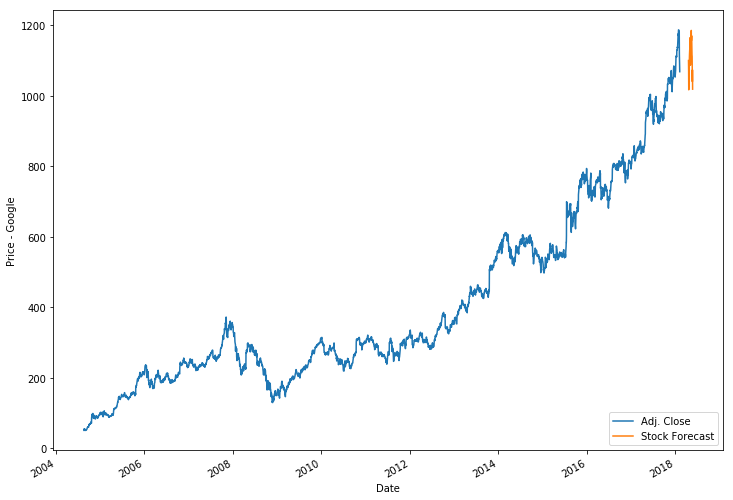

In [10]:
df['Stock Forecast'] = np.nan

last_date = df.iloc[-1].name # name of last date in dataset
last_date_unix = last_date.timestamp()
one_day_seconds = 86400
next_date_unix = last_date_unix + one_day_seconds

for i in stock_prediction:
    next_date = datetime.datetime.fromtimestamp(next_date_unix)
    next_date_unix += one_day_seconds
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]
    
df['Adj. Close'].plot()
df['Stock Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price - Google')
plt.rcParams['figure.figsize'] = (12,9)
plt.show()